In [ ]:
!pip install smolagents -U
!pip install langchain-community google-search-results
!pip install "smolagents[mcp]"

In [ ]:
#  Login to the Hugging Face Hub to have access to the Inference API.
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

# Import a LangChain tool with advanced search capabilities.
search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for an 80's themed party.")

In [ ]:
# Importing a tool collection from any MCP server.
import os
from smolagents import ToolCollection, CodeAgent
from mcp import StdioServerParameters
from smolagents import InferenceClientModel


model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")


server_parameters = StdioServerParameters(
    command="uvx",
    args=["--quiet", "pubmedmcp@0.1.3"],
    env={"UV_PYTHON": "3.12", **os.environ},
)

with ToolCollection.from_mcp(server_parameters, trust_remote_code=True) as tool_collection:
    agent = CodeAgent(tools=[*tool_collection.tools], model=model, add_base_tools=True)
    agent.run("Please recommend a remedy for flu.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a glorious 80's party.                                                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A vibrant 80's party in a neon-lit dance club, with people dressed in iconic 80's fashion, colorful    
  decorations, and dancing to retro music. High-res, photorealistic."                                              
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x7E16D0930200>

[Step 1: Duration 6.67 seconds| Input tokens: 2,104 | Output tokens: 101]

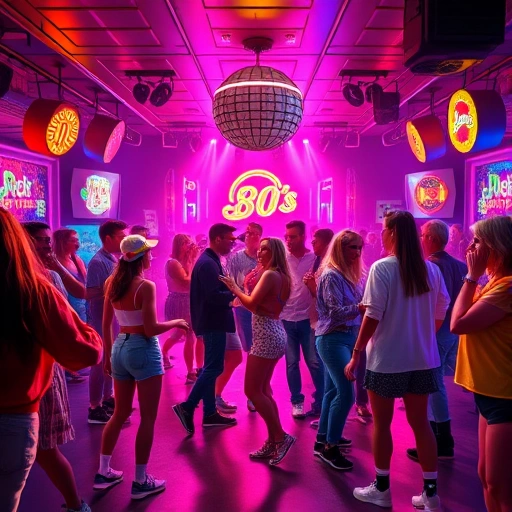

In [3]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

# Import a tool that can generate an image.
image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a glorious 80's party.")